In [14]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from itertools import product
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Lecture 10
## Seasonal Time Series Models
### Seasonal autoregressive and moving average SARMA(P,Q)s model
*  SARMA(P,Q)s represented by : 
*  $X_t = \phi_1 X_{t-s} + ... + \phi_P X_{t-Ps} + a_T - \Theta_1 a_{t-s} - ... - \Theta_Q a_{t-Qs}$
   *  Or $\phi_P(B^s)X_t = \Theta_Q(B^s)a_t$
   *  To be stationary and invertible, the roots must lie outside the unit circle
   * Both the ACF and PACF of the SARMA(P,Q)s model exhibit exponential decays and damped sine waves at the seasonal lags.
* $SARMA(1, 1)_{12}$ = $X_t = \Phi_1 X_{t-12} + a_t - \Theta_1 a_{t-12}$

In [36]:
df_data = pd.read_csv(r'/Users/dhruvpandit/Documents/GitHub/ISEG_AEF/STEM-EAP17/monthly_temperature_aomori_city.csv')
df_data['Time Stamp'] = pd.to_datetime(df_data[['year', 'month']].assign(DAY=1))
df_data.set_index('Time Stamp', inplace=True)
df_data

,year,month,temperature
Time Stamp,,,
1882-01-01,1882,1,-0.4
1882-02-01,1882,2,-0.6
1882-03-01,1882,3,1.2
1882-04-01,1882,4,8.9
1882-05-01,1882,5,12.1
...,...,...,...
2019-08-01,2019,8,24.8
2019-09-01,2019,9,21.2
2019-10-01,2019,10,15.1


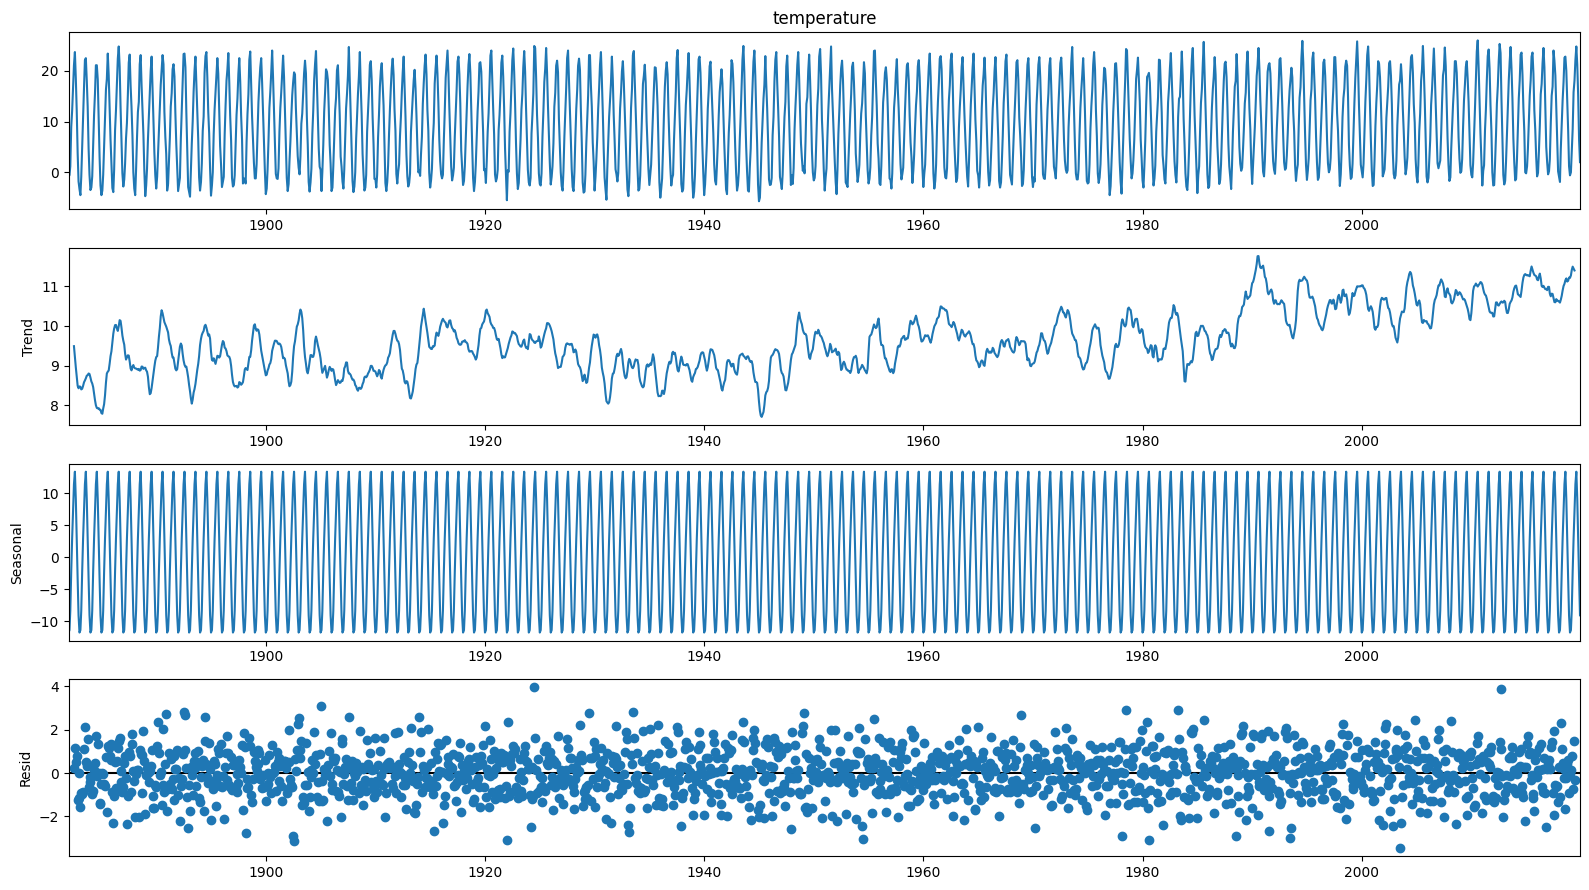

In [38]:
# Step 4) Time Series decomposition
decomposition = seasonal_decompose(df_data.temperature, model='additive')
plt.rcParams["figure.figsize"] = [16,9]
fig = decomposition.plot()


In [41]:
train = df_data.temperature[:1656-36]
test = df_data.temperature[1656-36:]

# Step 5) Check data stationary: ADF unit root test
def check_stationarity(timeseries, critical_value):   
    result = adfuller(timeseries,autolag='AIC')
    if result[1] < critical_value:
        print('Series is Stationary')
    else:
        print('Series is Non Stationary')
    dfoutput = pd.Series(result[0:4], 
                         index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print('The test statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
check_stationarity(train, 0.05)


Series is Stationary
The test statistic: -3.060544
p-value: 0.029614
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
